In [ ]:
# 라이브러리 추가
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as SP
from sklearn.preprocessing import PolynomialFeatures as PF
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#data 생성
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
print(perch_weight.shape)
df = pd.read_csv("/content/drive/MyDrive/AIML_bum/perch_full.csv")
perch_full = df.to_numpy()
df
perch_full

(56,)


array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

#1번 - 선형회귀

In [ ]:
perch_length = perch_full[:,0].reshape(-1,1)
print(perch_length.shape) #길이 데이터



(56, 1)


In [ ]:
tr_input,te_input,tr_target,te_target = SP(perch_length,perch_weight,random_state=42,test_size=0.25)
tr_input = tr_input.reshape(-1,1)
te_input = te_input.reshape(-1,1)

In [ ]:
lr1 = LR()
lr1.fit(tr_input,tr_target)

LinearRegression()

In [ ]:
#성능 평가
print(lr1.score(tr_input,tr_target))
print(lr1.score(te_input,te_target))

0.939846333997604
0.8247503123313558


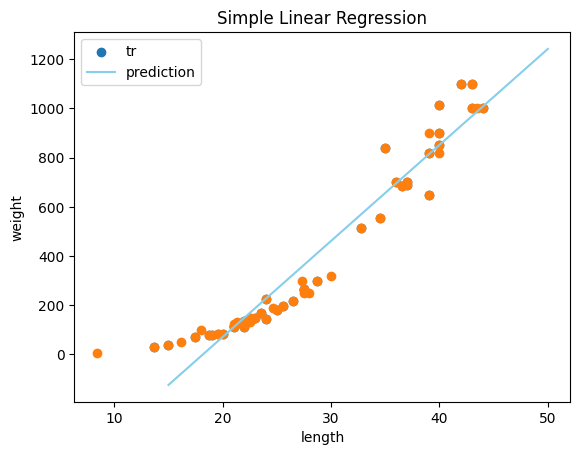

In [ ]:
#과대적합? 훈련데이터도 잘 표현을 못하므로 과소 적합 같다.

plt.scatter(tr_input,tr_target,label='tr')
plt.plot([15,50],[15*lr1.coef_ + lr1.intercept_,50*lr1.coef_+lr1.intercept_],color='skyblue',label='prediction')
plt.scatter(perch_length,perch_weight)
plt.title("Simple Linear Regression")
plt.xlabel("length")
plt.ylabel('weight')
plt.legend()
plt.show()

#2번 - 다중회귀

In [ ]:
# data preprocessing
tr2_input,te2_input,tr2_target,te2_target = SP(perch_full,perch_weight,random_state=42,test_size=0.25)
lr2 = LR()
lr2.fit(tr2_input,tr2_target)

LinearRegression()

In [ ]:
#성능 평가
print(lr2.score(tr2_input,tr2_target))
print(lr2.score(te2_input,te2_target))

0.9559326821885706
0.8796419177546366


In [ ]:
print(lr2.coef_,lr2.intercept_)

[ 9.07538153 69.46401443 38.00385678] -599.1708082981097


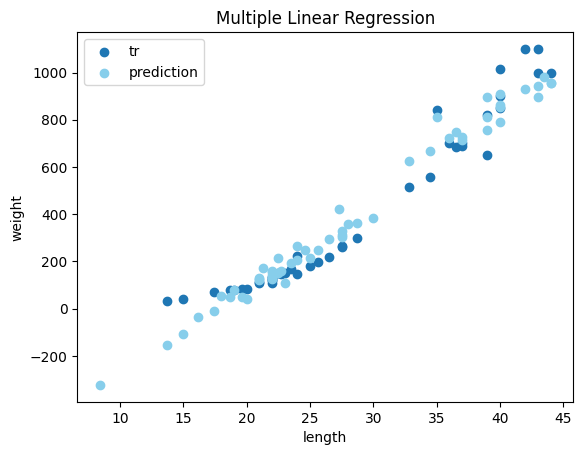

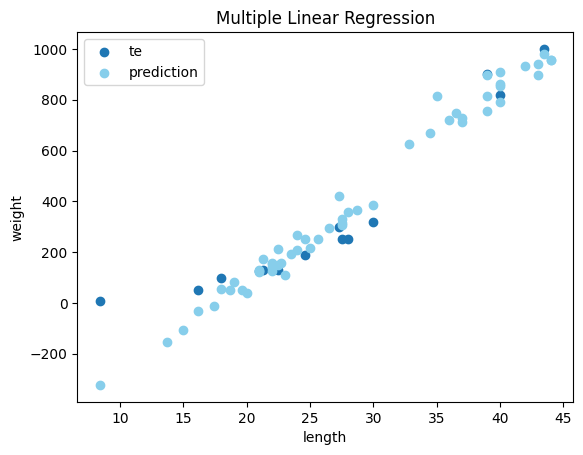

In [ ]:
#과대적합? 뚜렸하지는 않음, 성능이 나쁘지 않음
plt.scatter(tr2_input[:,0],tr2_target,label='tr')
for (len,he,wei) in (perch_full):
  plt.scatter(len,lr2.coef_[0]*len+lr2.coef_[1]*he+lr2.coef_[2]*wei+lr2.intercept_,color='skyblue')
plt.scatter(len,lr2.coef_[0]*len+lr2.coef_[1]*he+lr2.coef_[2]*wei+lr2.intercept_,color='skyblue',label='prediction')

plt.legend()
plt.title("Multiple Linear Regression")
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

plt.scatter(te2_input[:,0],te2_target,label='te')
for (len,he,wei) in (perch_full):
  plt.scatter(len,lr2.coef_[0]*len+lr2.coef_[1]*he+lr2.coef_[2]*wei+lr2.intercept_,color='skyblue')
plt.scatter(len,lr2.coef_[0]*len+lr2.coef_[1]*he+lr2.coef_[2]*wei+lr2.intercept_,color='skyblue',label="prediction")

plt.legend()
plt.title("Multiple Linear Regression")
plt.xlabel("length")
plt.ylabel('weight')
plt.show()



#3번 # 특성공학을 이용한 다항 다중 회귀

In [ ]:
# 데이터 전처리
tr3_input,te3_input,tr3_target,te3_target = SP(perch_full,perch_weight,random_state=42,test_size=0.25)
#특성공학
poly = PF(include_bias=False)
poly.fit(tr3_input)
train_poly = poly.transform(tr3_input)
test_poly = poly.transform(te3_input)
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
#model 학습
lr3 = LR()
lr3.fit(train_poly,tr3_target)


LinearRegression()

In [ ]:
print(lr3.score(train_poly,tr3_target))
print(lr3.score(test_poly,te3_target))

0.9903183436982125
0.9714559911594111


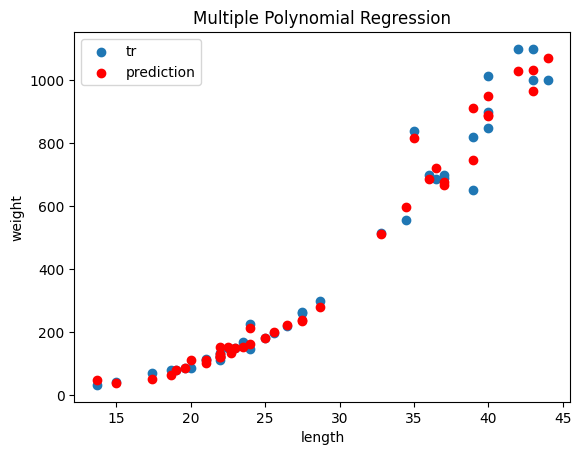

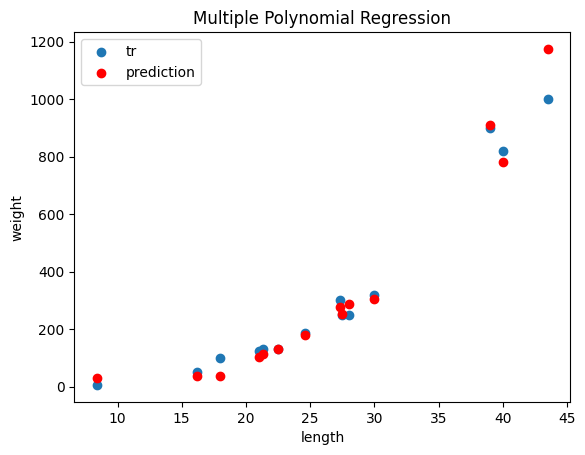

In [ ]:
# 모델이 일반화가 잘되어 있다(balance)
#과대적합? 뚜렸하지는 않음, 성능이 나쁘지 않음
plt.scatter(tr3_input[:,0],tr3_target,label='tr')
prediction = lr3.predict(train_poly)
plt.scatter(tr3_input[:,0],prediction,color='red',label='prediction')
plt.title("Multiple Polynomial Regression")
plt.xlabel("length")
plt.ylabel('weight')
plt.legend()
plt.show()

plt.scatter(te3_input[:,0],te3_target,label='tr')

prediction = lr3.predict(test_poly)
plt.scatter(te3_input[:,0],prediction,color='red',label='prediction')
plt.title("Multiple Polynomial Regression")
plt.xlabel("length")
plt.ylabel('weight')
plt.legend()
plt.show()

#4번 -성능 비교
##1번
###단순선형회귀 모델은 test data에서 정확성이 낮았을 뿐 아니라 학습 data조차 제대로 표현하지 못하는 underfitting(과소적합) 문제가 있었다.

##2번
###다중선형회귀 모델은 전반적으로 성능이 향상되었지만 여전히 학습 data와 test data 모두 잘 표현하지 못했고 학습 data에 비해 test  data의 정확성이 대략 0.1 정도 감소한것으로 보아 overfitting(과대적합)의 경향도 존재했다.

##3번
### 다중 다항 선형회귀 모델은 학습 data와 test data 모두 잘 표현했고 정확성에 있어서 큰 차이가 없는 것으로 보아 일반화가 잘된 모델이라는 것을 알 수 있다. balance가 좋았다.